# 점진적 학습(=온라인 학습)
* 훈련데이터가 한번에 준비되는 것이 아니라 조금씩 전달되며 업데이트 되는 경우에 多사용
* 훈련한 모델(이전 데이터)를 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련
* 대표적으로 **확률적 경사 하강법**이 존재

# 확률적 경사 하강법
* 확률적 = 무작위하게, 랜덤하게 = 훈련세트에서 random하게 하나의 샘플을 고르는것

=> 훈련세트에서 랜덤하게 샘플 하나를 선택해 가파른 경사 조금 내려가고 그 다음에 훈련세트에서 랜덤하게 한의 샘플을 선택해 가파른 경사를 또 조금 내려가다가 모든 샘플을 사용할 때까지 계속 이 과정 반복!
* **에포크(epoch)** : 훈련 세트를 한 번 모두 사용하는 과정
* 경사 = 기울기
* 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표임
* 한번에 너무 멀리씩 이동하다 보면 가장 큰 경사를 따라 내려가는 것이 아니라 올라갈 수도있음 주의

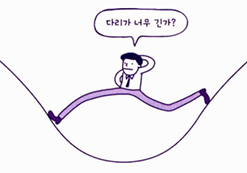
* 미니배치 경사 하강법 : 한개씩 말고 무작위로 몇개의 샘플을 선택해 경사를 따라 내려가는 방법
* 배치 경사 하강법 : 한번 경사로를 따라 이동하기 위해 전체 샘플을 이용하는 방법

-> 컴퓨터 자원 多사용

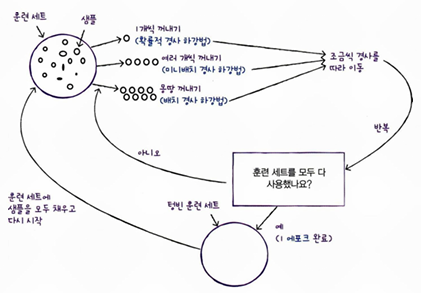

**신경망 알고리즘** : 일반적으로 많은 데이터를 이용하기 때문에 한번에 모든 데이터 사용이 어려워 확률적 경사하강법을 반드시 사용함.

# 손실함수(=비용함수)
* 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준값
* 비용함수 : 훈련세트에 있는 모든 샘플에 대한 손실함수의 합
* 손실함수는 미분가능이어야함

* 손실함수 사용 목적 : 예측 확률이 타깃과 가까울수록 손식 작게, 멀수록 손실을 크게 만드는것
* 양성 클래스(=타깃 값 1)에서는 예측이 1에 가까울수록 예측과 타깃 곱의 음수값이 점점 작아짐
* 음성 클래스(=타깃 값 0)에서는 예측 확률에 상관없이 타깃값 0이 곱해지면 0이 나오게 되므로 음성클래스를 양성클래스로 바꾸어 계산해주어야함

"1-음성클래스 예측 확률"으로 양성 클래스로 바꾼 뒤 양성클래스 타깃값 1에 곱한 뒤 음수로 바꾸어 주어야함
* 여기에 로그 취하면 손실값을 양수로 얻을 수 있음!!
# 로지스틱 손실함수(=이진 크로스 엔트로피 손실함수)
* 로지스틱 손실함수 이용하면 로지스틱 회귀 모델이 만들어짐
* 로그 취하면 지금 예측 확률이 0~1 사이 이므로 -log(예측확률)이 되어 양수값이 나오게 됨!

타깃이 0일 때는, “0일 확률”을 높여야 하고
타깃이 1일 때는, “1일 확률”을 높여야 함
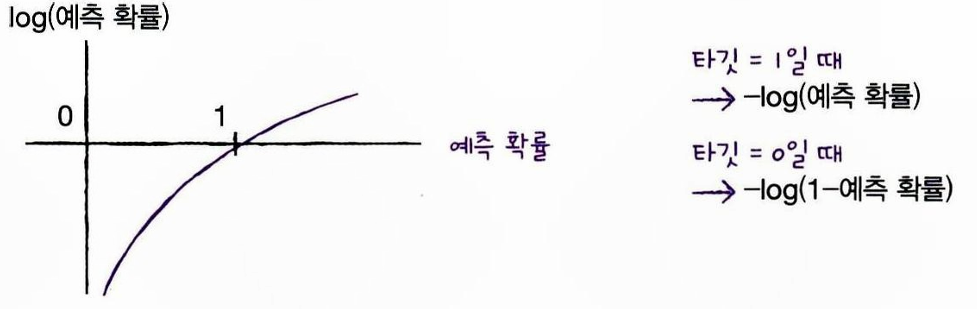
* 다중분류에서는 **크로스엔트로피 손실 함수**이용함.

회귀에서는 평균제곱 오차 등을 손실함수로 사용함

In [20]:
import pandas as pd

In [21]:
# 데이터프레임 생성
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [22]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height','Width']]
fish_target = fish['Species']

In [23]:
# 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [24]:
# 훈련세트와 테스트 세트의 특성을 표준화 전처리
# 훈련세트에서 학습한 통계값으로 테스트 세트도 변환해야함 주의
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [25]:
# 경사하강법 제공하는 클래스 불러오기
from sklearn.linear_model import SGDClassifier

In [26]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42) # log_loss : 클래스마다 이진 분류모델 생성함. 로지스틱 손실함수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [27]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


# 에포크와 과대/과소 적합
* 에포크 횟수 少 : 모델이 훈련 세트 덜 학습합
* 에포크 횟수 多 : 너무 많은 경우 테스트 세트에 과대적합 우려
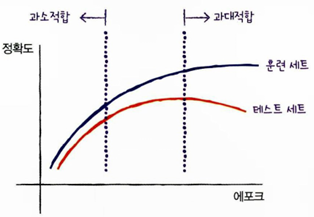
* 테스트세트 점수가 감소하기 시작하는 지점부터 모델이 과대적합되기 시작한것임

In [28]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [29]:
for _ in range(0, 300): # 300번의 에포크 동안 훈련 반복
    sc.partial_fit(train_scaled, train_target, classes = classes) # classes = classes는 사용 안하고 버리는 값인 0~299까지의 반복횟수를 임시저장하는 용도로 넣어둠
    # partial_fit() : 모델을 이어서 훈련할 때 사용하는 매서드, fit()과 유사하나 호출시마다 1 epoch씩 이어서 훈련할 수 있음
    train_score.append(sc.score(train_scaled, train_target))
    test_score. append(sc.score(test_scaled, test_target))

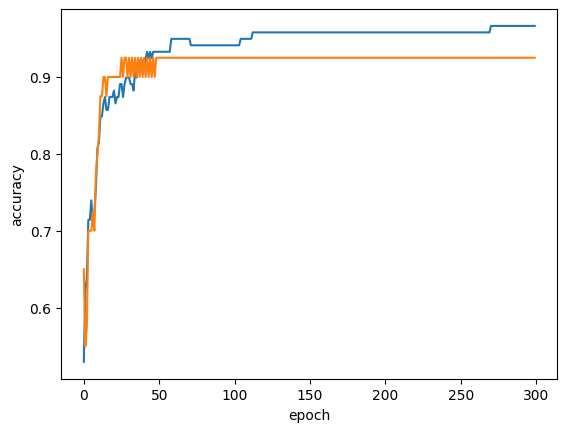

In [30]:
# 테스트세트, 훈련세트 점수 시각화 => 100번 에포크 즈음부터 테스트와 훈련데이터셋의 격차가 벌어짐
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

(+) SGDClassifier말고 SGDRegressor는 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공함

In [31]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42) # SGDClassifier는 자동으로 일정 에포크 동안 성능 향상이 없으면 자동으로 훈련 멈춤
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [32]:
# 힌지 손실 사용한 기타 예제
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42) #loss 매개변수 기본값이 hinge인데, hinge loss는 SVM(support vector machine)을 위한 손실함수임
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
